## Develope an AI based application that predicts PRICE of a HOUSE

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Modelling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import pickle

In [2]:
data=pd.read_csv('Datas/USA_Housing.csv')
display(data)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [4]:
print('COUNT NO OF NULL IN EACH COLUMN','\n',data.isnull().sum())

COUNT NO OF NULL IN EACH COLUMN 
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


<Axes: >

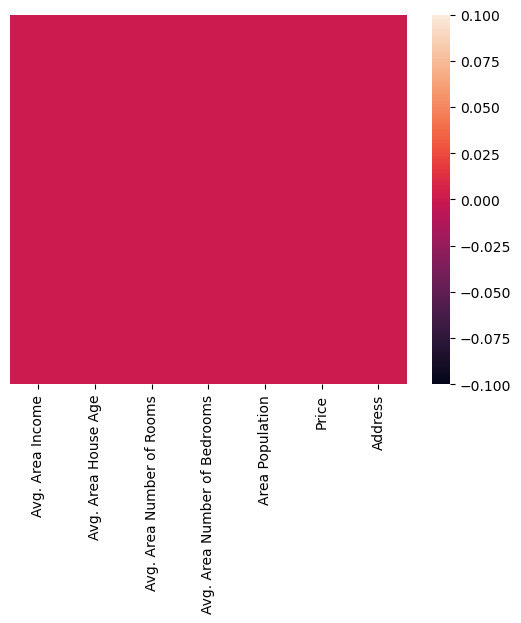

In [5]:
sns.heatmap(data.isnull(), yticklabels=False)

In [6]:
df = data.rename(columns = {"Avg. Area Income": "AAI", "Avg. Area House Age":"AAHA",
                                            "Avg. Area Number of Rooms":"AANR","Avg. Area Number of Bedrooms":"AANB",
                                              "Area Population":"AP"}) 

df.head()

,AAI,AAHA,AANR,AANB,AP,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.drop(['Address'],axis=1,inplace=True)

In [8]:
corel = df.corr()
corel.style.background_gradient()

,AAI,AAHA,AANR,AANB,AP,Price
AAI,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
AAHA,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
AANR,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AANB,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
AP,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [9]:
corel.nlargest(6,'Price')['Price']

Price    1.000000
AAI      0.639734
AAHA     0.452543
AP       0.408556
AANR     0.335664
AANB     0.171071
Name: Price, dtype: float64

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
#categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
#print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['AAI', 'AAHA', 'AANR', 'AANB', 'AP', 'Price']


C:\Users\Surat\AppData\Local\Temp\ipykernel_20828\3499227362.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AAI'])


<Axes: xlabel='AAI', ylabel='Density'>

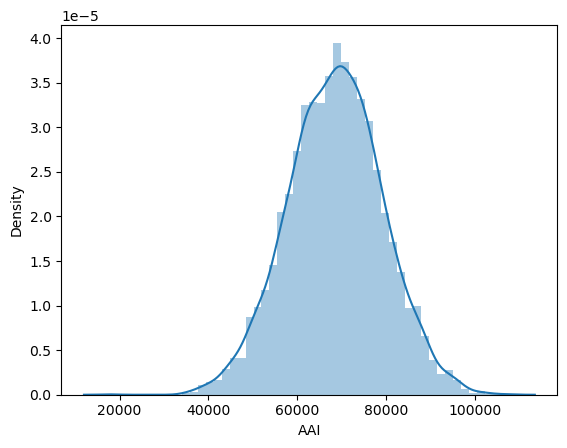

In [11]:
sns.distplot(df['AAI'])

C:\Users\Surat\AppData\Local\Temp\ipykernel_20828\2845913197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AAHA'])


<Axes: xlabel='AAHA', ylabel='Density'>

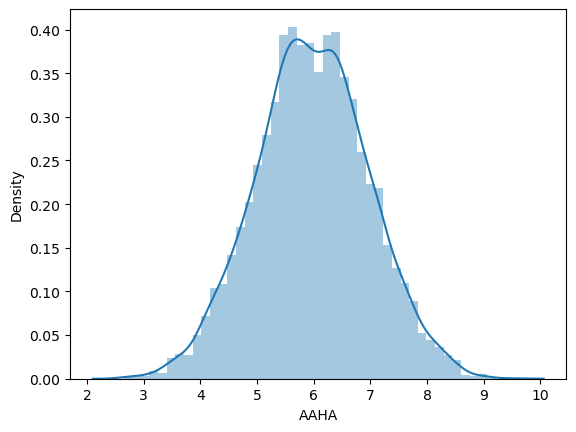

In [12]:
sns.distplot(df['AAHA'])

C:\Users\Surat\AppData\Local\Temp\ipykernel_20828\860240983.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AANR'])


<Axes: xlabel='AANR', ylabel='Density'>

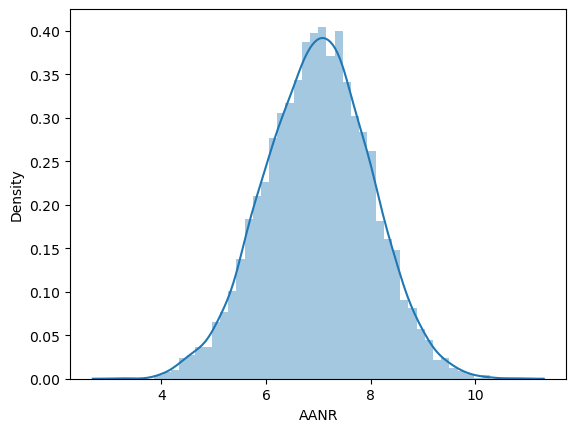

In [13]:
sns.distplot(df['AANR'])

C:\Users\Surat\AppData\Local\Temp\ipykernel_20828\38363504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AANB'])


<Axes: xlabel='AANB', ylabel='Density'>

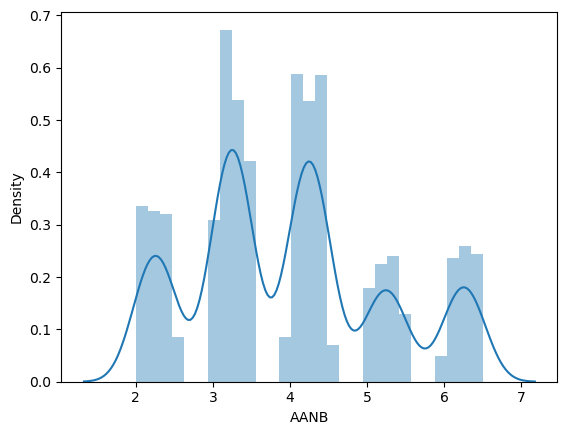

In [14]:
sns.distplot(df['AANB'])

C:\Users\Surat\AppData\Local\Temp\ipykernel_20828\3917061066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AP'])


<Axes: xlabel='AP', ylabel='Density'>

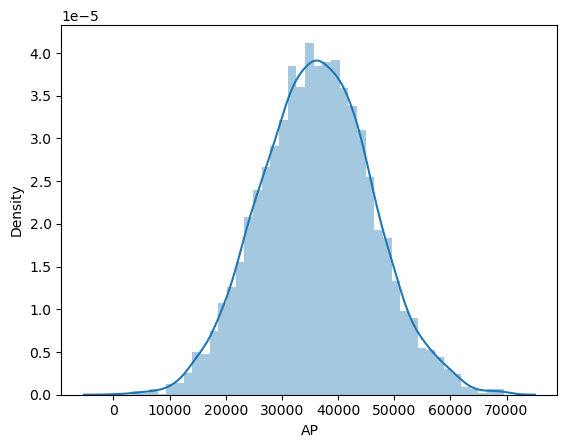

In [15]:
sns.distplot(df['AP'])

<Axes: xlabel='AP'>

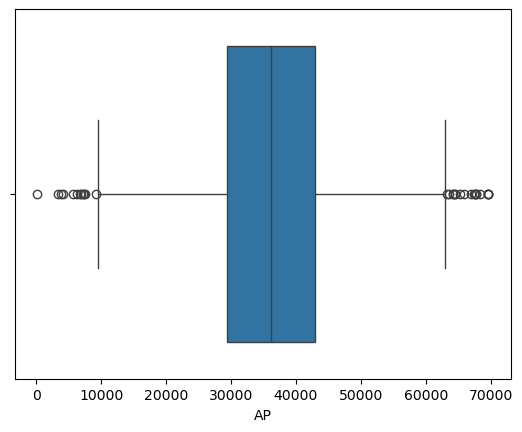

In [16]:
sns.boxplot(x=df['AP'])

In [17]:
arr= df['AP'].values

arr = np.sort(arr)

Q1,Q3 = np.percentile(arr , [25,75])
print(Q1, Q3)

IQR = (Q3 - Q1)
print(IQR)

lower_range = Q1 -(1.5 * IQR)
print(lower_range)

upper_range = Q3 + (1.5 * IQR)
print(upper_range)

#df[(df['AP'] < lower_range) | (df['AP'] > upper_range)]

29403.928701608518 42861.290768915605
13457.362067307087
9217.885600647885
63047.33386987624


In [18]:
print ('BEFORE REMOVING OUTLIER FOR HEAD SIZE SHAPE IS ', df.shape)

df.drop(df[(df['AP'] < lower_range) | (df['AP'] > upper_range)].index , inplace=True)

print ('AFTER REMOVING OUTLIER FOR HEAD SIZE SHAPE IS ', df.shape)

BEFORE REMOVING OUTLIER FOR HEAD SIZE SHAPE IS  (5000, 6)
AFTER REMOVING OUTLIER FOR HEAD SIZE SHAPE IS  (4970, 6)


<Axes: xlabel='AANR'>

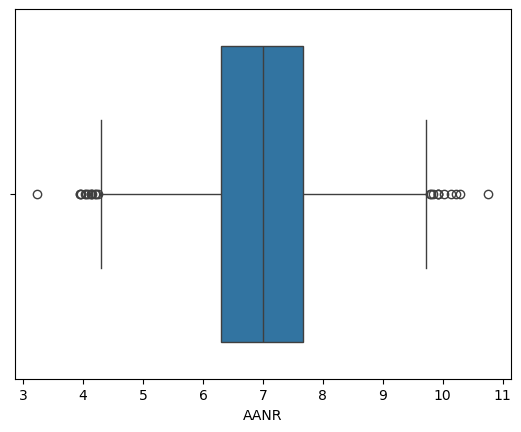

In [19]:
sns.boxplot(x=df['AANR'])

In [20]:
print ('BEFORE REMOVING OUTLIER FOR HEAD SIZE SHAPE IS ', df.shape)

arr1= df['AANR'].values

arr1 = np.sort(arr1)

Q1,Q3 = np.percentile(arr1 , [25,75])
print(Q1, Q3)

IQR = (Q3 - Q1)
print(IQR)

lower_range = Q1 -(1.5 * IQR)
print(lower_range)

upper_range = Q3 + (1.5 * IQR)
print(upper_range)

#df[(df['AANR'] < lower_range) | (df['AANR'] > upper_range)]

BEFORE REMOVING OUTLIER FOR HEAD SIZE SHAPE IS  (4970, 6)
6.296989890982829 7.665494747799624
1.368504856816795
4.244232605757636
9.718252033024816


In [21]:
df.drop(df[(df['AANR'] < lower_range) | (df['AANR'] > upper_range)].index , inplace=True)

print ('AFTER REMOVING OUTLIER FOR HEAD SIZE SHAPE IS ', df.shape)

AFTER REMOVING OUTLIER FOR HEAD SIZE SHAPE IS  (4946, 6)


<Axes: xlabel='AAHA'>

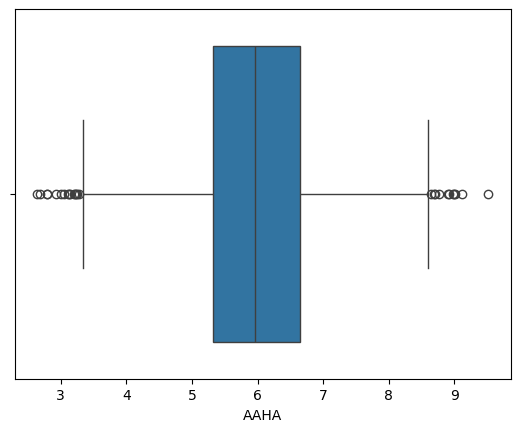

In [22]:
sns.boxplot(x=df['AAHA'])

In [23]:
print ('BEFORE REMOVING OUTLIER FOR HEAD SIZE SHAPE IS ', df.shape)

arr2= df['AAHA'].values

arr1 = np.sort(arr2)

Q1,Q3 = np.percentile(arr2 , [25,75])
print(Q1, Q3)

IQR = (Q3 - Q1)
print(IQR)

lower_range = Q1 -(1.5 * IQR)
print(lower_range)

upper_range = Q3 + (1.5 * IQR)
print(upper_range)

#df[(df['AAHA'] < lower_range) | (df['AAHA'] > upper_range)]

BEFORE REMOVING OUTLIER FOR HEAD SIZE SHAPE IS  (4946, 6)
5.324372103007897 6.648156536987428
1.3237844339795313
3.3386954520386
8.633833187956725


In [24]:
df.drop(df[(df['AAHA'] < lower_range) | (df['AAHA'] > upper_range)].index , inplace=True)

print ('AFTER REMOVING OUTLIER FOR HEAD SIZE SHAPE IS ', df.shape)

AFTER REMOVING OUTLIER FOR HEAD SIZE SHAPE IS  (4920, 6)


<Axes: xlabel='AAHA'>

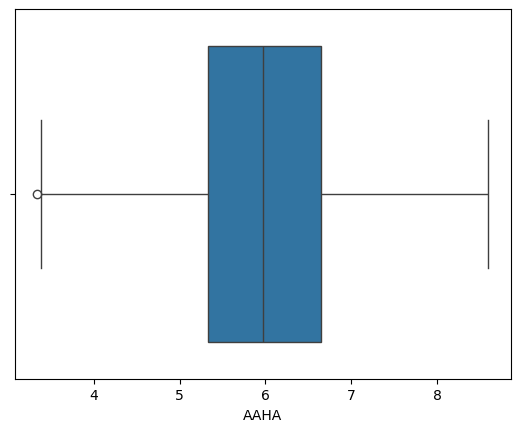

In [25]:
sns.boxplot(x=df['AAHA'])

<Axes: xlabel='AAI'>

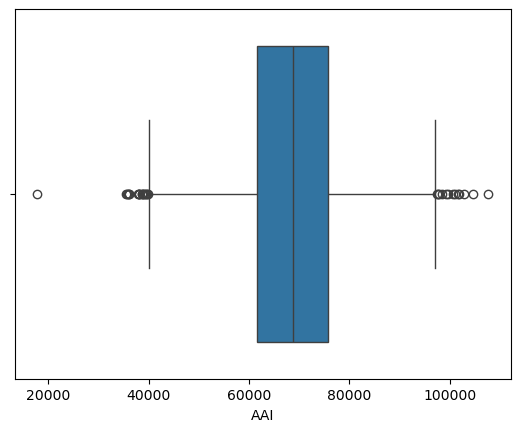

In [26]:
sns.boxplot(x=df['AAI'])

In [27]:
print ('BEFORE REMOVING OUTLIER FOR HEAD SIZE SHAPE IS ', df.shape)

arr3= df['AAI'].values

arr3 = np.sort(arr3)

Q1,Q3 = np.percentile(arr3 , [25,75])
print(Q1, Q3)

IQR = (Q3 - Q1)
print(IQR)

lower_range = Q1 -(1.5 * IQR)
print(lower_range)

upper_range = Q3 + (1.5 * IQR)
print(upper_range)

#df[(df['AAI'] < lower_range) | (df['AAI'] > upper_range)]

BEFORE REMOVING OUTLIER FOR HEAD SIZE SHAPE IS  (4920, 6)
61485.15018827292 75828.04980038168
14342.899612108755
39970.80077010979
97342.3992185448


In [28]:
df.drop(df[(df['AAI'] < lower_range) | (df['AAI'] > upper_range)].index , inplace=True)

print ('AFTER REMOVING OUTLIER FOR HEAD SIZE SHAPE IS ', df.shape)

AFTER REMOVING OUTLIER FOR HEAD SIZE SHAPE IS  (4889, 6)


<Axes: xlabel='AAI'>

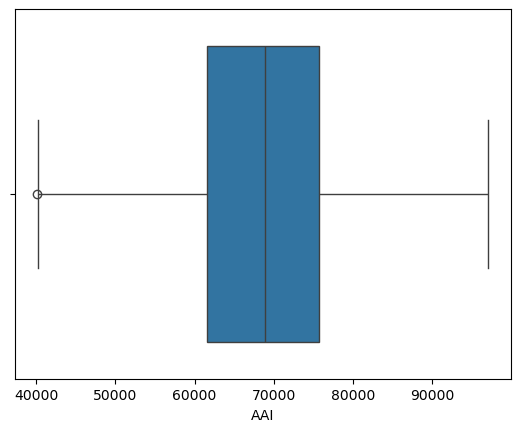

In [29]:
sns.boxplot(x=df['AAI'])

## CREATE Output & Input Data &TRAIN AND TEST DATA

In [30]:
opd= df['Price']
ipd=df.drop(['Price'],axis=1)
display(opd,"\n\n", ipd)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4889, dtype: float64

'\n\n'

,AAI,AAHA,AANR,AANB,AP
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [31]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(ipd,opd,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3911, 5), (978, 5), (3911,), (978,))

## Model Train, Predict and Evaluate

In [32]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-'*25)
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    score = model_test_r2*100
    print(" Accuracy of the model is %.2f" %score)
    r2_list.append(score)
    
    print('='*50)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 101186.3626
- Mean Absolute Error: 81603.3137
- R2 Score: 0.9141
-------------------------
Model performance for Test set
- Root Mean Squared Error: 99440.9499
- Mean Absolute Error: 79241.0528
- R2 Score: 0.9182
 Accuracy of the model is 91.82


Lasso
Model performance for Training set
- Root Mean Squared Error: 101186.3626
- Mean Absolute Error: 81603.3117
- R2 Score: 0.9141
-------------------------
Model performance for Test set
- Root Mean Squared Error: 99440.9771
- Mean Absolute Error: 79241.0809
- R2 Score: 0.9182
 Accuracy of the model is 91.82


Ridge
Model performance for Training set
- Root Mean Squared Error: 101186.3783
- Mean Absolute Error: 81603.7295
- R2 Score: 0.9141
-------------------------
Model performance for Test set
- Root Mean Squared Error: 99440.8680
- Mean Absolute Error: 79241.7441
- R2 Score: 0.9182
 Accuracy of the model is 91.82


K-Neighbors Regressor
Model performance for

In [34]:
df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'Score']).sort_values(by=["Score"],ascending=False)
print(df)
df.to_excel("Datas/HPoutput.xlsx")

                Model Name      Score
2                    Ridge  91.815096
0        Linear Regression  91.815083
1                    Lasso  91.815078
7    CatBoosting Regressor  90.880543
5  Random Forest Regressor  88.387843
6             XGBRegressor  88.070839
8       AdaBoost Regressor  82.098665
4            Decision Tree  76.800964
3    K-Neighbors Regressor  50.656805


## Ridge Model

In [35]:
modelR = Ridge().fit(x_train,y_train)

In [36]:
y_train_pred = modelR.predict(x_train)
y_test_pred = modelR.predict(x_test)

In [37]:
print('R^2 FOR train: {0:.4f}'.format(r2_score(y_train, y_train_pred)))
print('R^2 FOR TEST: {0:.4f}'.format(r2_score(y_test, y_test_pred)))

R^2 FOR train: 0.9141
R^2 FOR TEST: 0.9182


In [38]:
filename = open('Datas/hpmodel.pkl', 'wb')
pickle.dump(modelR,filename )
filename.close()